# Deep Learning Dasar 1

Pada sesi ini kita akan mulai mempelajari dasar-dasar dari Deep Learning. 
Library yang akan digunakan di sini adalah [Keras](https://keras.io/).

Target dari pembelajaran ini adalah, siswa bisa memahami konsep dasar dari deep learning dalam pengaplikasiannya menggunakan bahasa pemrograman Python, sebagai contoh kita akan mencoba membuat sentimen analysis sederhana.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

## Mempersiapkan Dataset

In [2]:
words = [
    "saya suka makan ayam maru",
    "saya tidak suka makan ayam",
    "ayam maru rasanya enak",
    "masakan ini rasanya tidak istimewa",
    "kurang mantap bumbunya",
    "enak sih ini masakannya",
    "bumbu masakan terbaik",
    "masih enak masakan ibu saya"
]
label = [1, 0, 1, 0, 0, 1, 1, 0]

## Mempersiapkan Fitur

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [4]:
words_splited = [word.split(" ") for word in words]
words_splited

[['saya', 'suka', 'makan', 'ayam', 'maru'],
 ['saya', 'tidak', 'suka', 'makan', 'ayam'],
 ['ayam', 'maru', 'rasanya', 'enak'],
 ['masakan', 'ini', 'rasanya', 'tidak', 'istimewa'],
 ['kurang', 'mantap', 'bumbunya'],
 ['enak', 'sih', 'ini', 'masakannya'],
 ['bumbu', 'masakan', 'terbaik'],
 ['masih', 'enak', 'masakan', 'ibu', 'saya']]

In [5]:
tzer = Tokenizer()
tzer.fit_on_texts(words_splited)

In [6]:
words_tokenized=tzer.texts_to_sequences(words_splited)
words_tokenized

[[1, 5, 6, 2, 7],
 [1, 8, 5, 6, 2],
 [2, 7, 9, 3],
 [4, 10, 9, 8, 11],
 [12, 13, 14],
 [3, 15, 10, 16],
 [17, 4, 18],
 [19, 3, 4, 20, 1]]

In [7]:
tzer.sequences_to_texts([[3, 8, 9, 4, 5]])

['enak tidak rasanya masakan suka']

In [8]:
X = []
y = np.array(label)
for wt in words_tokenized:
    ph = np.zeros(5)
    ph[:len(wt)] = wt
    X.append(ph)
X = np.array(X)
X

array([[ 1.,  5.,  6.,  2.,  7.],
       [ 1.,  8.,  5.,  6.,  2.],
       [ 2.,  7.,  9.,  3.,  0.],
       [ 4., 10.,  9.,  8., 11.],
       [12., 13., 14.,  0.,  0.],
       [ 3., 15., 10., 16.,  0.],
       [17.,  4., 18.,  0.,  0.],
       [19.,  3.,  4., 20.,  1.]])

In [9]:
X.shape, y.shape

((8, 5), (8,))

## Buat Model

In [10]:
model = Sequential()
model.add(Dense(10, activation="relu", input_shape=(5,)))
model.add(Dense(5, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [11]:
# !pip install pydot
# !pip install graphviz

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


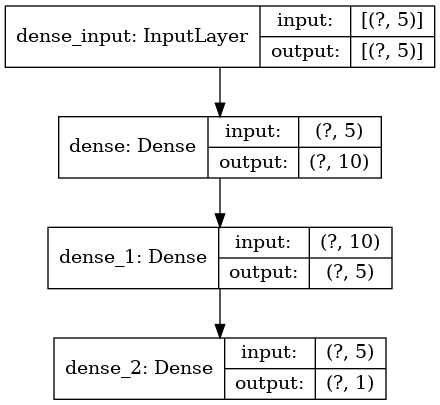

In [13]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, expand_nested=True)

In [14]:
model.compile(optimizer="adam", loss="mae")

* adam = Adam optimizer
* mae = Mean Absolute Error

In [20]:
model.fit(X, y, batch_size=2, epochs=100, verbose=0)
model.evaluate(X, y)

1/1 [==============================] - 0s 3ms/step - loss: 0.3078


0.30783766508102417

In [21]:
yhat = model.predict(tzer.texts_to_sequences(["saya suka makan ayam maru".split(" ")]))
yhat

array([[0.765369]], dtype=float32)

In [22]:
np.round(yhat)[0][0]

1.0

In [23]:
yhat = model.predict(tzer.texts_to_sequences(["saya tidak suka makan ayam".split(" ")]))
yhat

array([[0.00766866]], dtype=float32)

In [24]:
np.round(yhat)[0][0]

0.0